In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

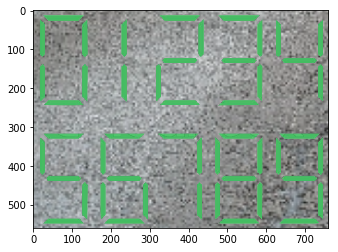

In [2]:
im=cv2.imread('imgs/original.png')
plt.imshow(im)

In [3]:
im = np.logical_and(im[:,:,1]>170, im[:,:,0]<100)
im = im.astype(np.int)*255

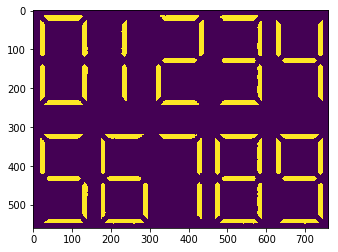

In [4]:
plt.imshow(im)

In [5]:
size = im.shape

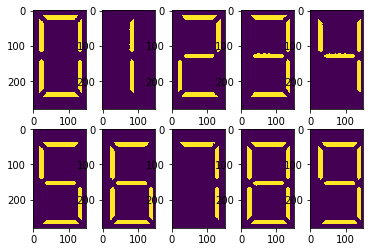

In [6]:
row = size[0]/2
col = size[0]/4+10
count = 1
plt.figure
im_train = []
for j in range(1,3):
    for i in range(1,6):
        im_clp = im[row*(j-1):row*j, col*(i-1):col*i]
        cv2.imwrite('imgs/'+str(count)+'.png', im_clp)
        plt.subplot(2,5,count)
        plt.imshow(im_clp)
        count += 1
        im_train.append(im_clp)

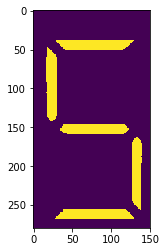

In [7]:
plt.imshow(im_train[5])

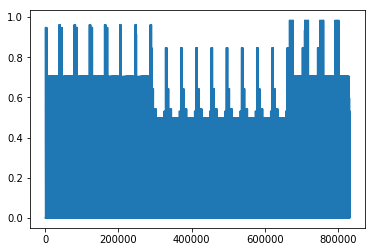

In [8]:
hog_extractor = cv2.HOGDescriptor()
hog = hog_extractor.compute(im_train[5].astype(np.uint8))
plt.plot(hog)

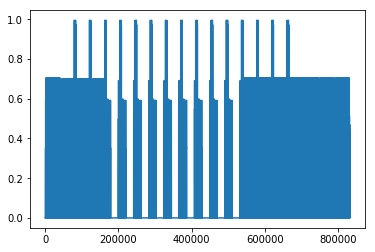

In [9]:
hog_extractor = cv2.HOGDescriptor()
hog = hog_extractor.compute(im_train[0].astype(np.uint8))
plt.plot(hog)

In [16]:
feature_HOG = []
label = []
for i in range(0,10):
    hog = hog_extractor.compute(im_train[i].astype(np.uint8))
    hog = hog.reshape(len(hog))
    feature_HOG.append(hog)
    label.append(i)

(831600, 1)
(831600, 1)
(831600, 1)
(831600, 1)
(831600, 1)
(831600, 1)
(831600, 1)
(831600, 1)
(831600, 1)
(831600, 1)


In [17]:
feature_HOG[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [18]:
[len(v) for v in feature_HOG]

[831600,
 831600,
 831600,
 831600,
 831600,
 831600,
 831600,
 831600,
 831600,
 831600]

In [19]:
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(feature_HOG, label)

In [24]:
prd = clf.predict(feature_HOG)
prd

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])